<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Explainable_linguistic_summaries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan
!pip install tensorflow"""

'CMD = "wget https://raw.githubusercontent.com/Diyago/"  "GAN-for-tabular-data/master/requirements.txt"\n\n!{CMD}\n!pip install -r requirements.txt\n!pip install tabgan\n!pip install tensorflow'

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EMG_Stroke_1.xlsx")

#dataset=pd.read_excel("/content/drive/MyDrive/Publications/EMG Stroke/Data/EMG_Stroke_1.xlsx")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))
result = {}

In [4]:
set(list(dataset['Status']))

{'Control', 'Stroke'}

In [5]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 1])

In [6]:
set(list(dataset['Status']))

{'Control', 'Stroke'}

In [7]:
X = dataset.iloc[:,2:]
y = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,2:])

In [8]:
X

,MDF_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEPFEM_LT,MNP_BICEP_FEM_LT,TP_BICEP_FEM_LT,MDF_BICEP_FEM_RT,MNF_BICEP_FEM_RT,PKF_BICEP_FEM_RT,MNP_BICEP_FEM_RT,TP_BICEP_FEM_RT,MDF_LAT_GASTRO_LT,MNF_LAT_GASTRO_LT,PKF_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_LAT_GASTRO_LT,MDF_LAT_GASTRO_RT,MNF_LAT_GASTRO_RT,PKF_LAT_GASTRO_RT,MNP_LAT_GASTRO_RT,TP_LAT_GASTRO_RT
0,62.926827,183.658531,59.268291,0.001781,1.825106,88.536583,203.414628,54.878047,0.001770,1.814557,111.951216,187.317068,100.975607,0.003372,3.456223,98.780485,172.682922,62.195120,0.011208,11.487837
1,67.317071,175.609751,15.365853,0.003445,3.530884,98.048778,207.073165,64.390242,0.002374,2.433352,57.804876,188.780482,5.853658,0.002010,2.060074,100.243899,199.756092,144.878044,0.001281,1.312815
2,84.878046,191.707311,10.243902,0.005324,5.457119,88.536583,199.756092,10.975609,0.005711,5.853517,27.073170,179.999995,8.780488,0.005159,5.288125,29.268292,163.902434,9.512195,0.003675,3.767115
3,10.243902,160.243898,7.317073,0.003761,3.855294,24.878048,192.439019,8.048780,0.004579,4.693017,38.780487,183.658531,5.121951,0.000906,0.928694,12.439024,152.926825,5.121951,0.005100,5.226992
4,13.902439,147.073166,6.585366,0.007078,7.254462,55.609754,148.536581,16.829268,0.002487,2.548960,110.487802,213.658530,107.560972,0.002733,2.800849,72.439022,154.390239,44.634145,0.002725,2.792952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,13.902432,152.926756,8.048777,0.000434,0.445275,8.048777,57.804850,7.317070,0.331949,340.247783,115.609701,203.414537,59.999971,0.000205,0.210085,72.438990,182.926742,16.097553,0.000180,0.184714
374,32.195107,179.268207,11.707311,0.000265,0.271432,8.780484,53.414609,6.585363,0.242454,248.515460,118.536529,199.024295,65.121920,0.000233,0.239107,38.048762,188.048691,9.512191,0.000221,0.226852
375,14.634139,160.975533,10.243898,0.000382,0.391040,8.780484,35.853641,7.317070,0.456689,468.106572,107.560924,194.634054,98.048734,0.000219,0.223969,56.341437,190.975519,14.634139,0.000190,0.195196
376,10.243898,152.195049,7.317070,0.004303,4.410924,11.707311,38.048762,8.780484,0.176679,181.096091,14.634139,188.048691,13.170725,0.001780,1.824840,62.195092,186.585277,10.243898,0.000389,0.398552


#Feature Selection

# **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [9]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [10]:
#number_of_feat=int(input("Number Of Best Features: "))
number_of_feat = 15

In [11]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                Specs      Score
19   TP_LAT_GASTRO_RT  11.896853
14   TP_LAT_GASTRO_LT   8.448660
13  MNP_LAT_GASTRO_LT   8.448660
9     TP_BICEP_FEM_RT   7.648430
8    MNP_BICEP_FEM_RT   7.648430
15  MDF_LAT_GASTRO_RT   7.568313
6    MNF_BICEP_FEM_RT   7.371348
4     TP_BICEP_FEM_LT   6.659378
3    MNP_BICEP_FEM_LT   6.659378
1    MNF_BICEP_FEM_LT   5.759630
7    PKF_BICEP_FEM_RT   4.275974
5    MDF_BICEP_FEM_RT   4.212970
17  PKF_LAT_GASTRO_RT   3.695719
0    MDF_BICEP_FEM_LT   1.925341
10  MDF_LAT_GASTRO_LT   1.687033


In [12]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

# **Manual Features**

In [13]:
list_of_feat2=[

'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'p2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1_gap_peak_amp_50ms',
'n2_gap_peak_amp_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'n1p2_gap_diff_50ms',
'gamma_freq_20ms',
'total_auc_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_p2n2_UP_50ms',
'ABR_peak_auc_50ms'

    ]

print(len(list_of_feat2))

16


In [14]:
list_of_feat3=[
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_age-norm_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_total_abs_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'alpha_peak_auc_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat3))

16


In [15]:
X_new = dataset[list_of_feat1]
y_new = dataset.iloc[:, 0]

## Data Partition

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 42)

In [17]:
'''
X_train=X_new.iloc[:134,:]
X_test=X_new.iloc[134:,:]
y_train=y_new.iloc[:134]
y_test=y_new.iloc[134:]
'''

'\nX_train=X_new.iloc[:134,:]\nX_test=X_new.iloc[134:,:]\ny_train=y_new.iloc[:134]\ny_test=y_new.iloc[134:]\n'

In [18]:
X_train

,TP_LAT_GASTRO_RT,TP_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_BICEP_FEM_RT,MNP_BICEP_FEM_RT,MDF_LAT_GASTRO_RT,MNF_BICEP_FEM_RT,TP_BICEP_FEM_LT,MNP_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEP_FEM_RT,MDF_BICEP_FEM_RT,PKF_LAT_GASTRO_RT,MDF_BICEP_FEM_LT,MDF_LAT_GASTRO_LT
168,10.308265,3.138053,0.003062,1.025269,0.001000,63.658535,160.975605,0.052888,0.000052,126.585362,53.414633,51.951218,43.902438,16.097560,70.243900
301,6.453927,0.800284,0.000781,1.982205,0.001934,33.658521,149.999928,3.057884,0.002983,142.682859,10.243898,22.682916,6.585363,14.634139,10.975605
280,22.617570,36.281557,0.035397,15.815820,0.015430,10.243898,170.487724,4.231722,0.004129,196.829174,6.585363,11.707311,10.243898,42.439004,11.707311
60,3.107403,1.987515,0.001939,2.677335,0.002612,21.219512,168.292678,3.427943,0.003344,195.365848,8.780488,14.634146,10.243902,19.024390,9.512195
342,4.278854,9.121129,0.008899,10.828464,0.010564,93.658492,174.877965,12.844586,0.012531,183.658449,8.780484,58.536557,8.780484,32.195107,15.365846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,16.831445,4.100178,0.004000,3.616162,0.003528,10.975609,177.073165,7.029500,0.006858,117.073167,7.317073,10.975609,10.975609,10.975609,16.097560
106,3.247403,7.078530,0.006906,5.507812,0.005373,41.707316,130.975606,3.952270,0.003856,161.707312,9.512195,20.487804,23.414633,16.829268,43.902438
270,0.029851,0.306071,0.000299,0.012803,0.000012,93.658492,236.341351,0.023580,0.000023,158.048705,5.853656,76.829232,59.999971,60.731678,83.414594
348,5.015142,2.102568,0.002051,2.145594,0.002093,10.975605,148.536515,2.003547,0.001955,168.292603,5.121949,10.975605,8.048777,12.439018,59.999971


In [19]:
X_test

,TP_LAT_GASTRO_RT,TP_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_BICEP_FEM_RT,MNP_BICEP_FEM_RT,MDF_LAT_GASTRO_RT,MNF_BICEP_FEM_RT,TP_BICEP_FEM_LT,MNP_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEP_FEM_RT,MDF_BICEP_FEM_RT,PKF_LAT_GASTRO_RT,MDF_BICEP_FEM_LT,MDF_LAT_GASTRO_LT
287,0.125598,0.235166,0.000229,246.346414,0.240338,65.853627,40.243883,0.204082,0.000199,179.999914,7.317070,8.780484,24.146330,19.756088,119.999943
329,2.567036,9.997635,0.009754,0.975275,0.000951,8.048777,117.804822,0.356011,0.000347,28.536572,5.853656,7.317070,5.121949,7.317070,8.780484
323,1.470870,9.330302,0.009103,4.525812,0.004415,15.365846,130.975547,5.662525,0.005524,124.390185,8.048777,10.975605,9.512191,10.975605,9.512191
145,4.181995,3.795536,0.003703,35.492452,0.034627,43.902438,119.268289,5.482423,0.005349,190.975604,8.048780,11.707317,9.512195,59.268291,21.219512
55,0.752557,1.843727,0.001799,23.755420,0.023176,68.048778,49.756096,3.155970,0.003079,111.219509,7.317073,11.707317,13.170731,18.292682,93.658534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,60.733133,7.293956,0.007116,8.882355,0.008666,12.439024,153.658532,15.069732,0.014702,136.829264,10.243902,16.097560,6.585366,11.707317,10.975609
126,0.000000,0.000000,0.000000,0.000000,0.000000,749.268270,749.268270,0.000000,0.000000,749.268270,749.268270,749.268270,749.268270,749.268270,749.268270
334,40.432406,37.671968,0.036753,10.937351,0.010671,13.902432,110.487752,13.553757,0.013223,162.438947,7.317070,10.243898,14.634139,12.439018,13.902432
333,32.029467,10.153633,0.009906,3.439660,0.003356,9.512191,171.219431,3.102810,0.003027,205.609658,6.585363,9.512191,10.243898,65.121920,8.780484


In [20]:
'''
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100,
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 600, "patience": 25, \
          "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),\
          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

X_train = X_train.append(gen_x)
y_train = y_train.append(gen_y)
'''

'\nfrom tabgan.sampler import GANGenerator\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\ngen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,\n           bot_filter_quantile=0.001, top_filter_quantile=0.999,               is_post_process=True,\n           adversarial_model_params={\n               "metrics": "rmse", "max_depth": 2, "max_bin": 100,\n               "learning_rate": 0.02, "random_state":                 42, "n_estimators": 600,\n           }, pregeneration_frac=2, only_generated_data=False,           gan_params = {"batch_size": 600, "patience": 25,           "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False,           use_adversarial=True)\n\nX_train = X_train.append(gen_x)\ny_train = y_train.append(gen_y)\n'

# **SMOTE**

In [21]:
!pip install imbalanced-learn
from tqdm.notebook import tqdm
from imblearn.over_sampling import SMOTE
import statistics as st

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


def Search_Some(dataset,some):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic






def find_stat_classwise(dataframe,col,target_col,temp_tar,stat_type='median'):
  print("Calculating-",col,"|| Target-",temp_tar)
  list_1 = []
  for row in range(dataframe.shape[0]):
      if str(dataframe[col][row]) != 'nan' and str(dataframe[target_col][row]) == temp_tar:
        list_1.append(dataframe[col][row])

  try:
    if stat_type == 'median':
      return st.median(list_1)
    elif stat_type == 'mean':
      return st.mean(list_1)
    elif stat_type == 'mode':
      return st.mode(list_1)

  except:
    print("No Class exist")
    return 'nan'



def clsswise_null_rmv(df,target_cls,stat_type='median'):

  cls = list(set(df[target_cls]))

  refine = []
  print("Processing Null Dictionary.....")
  d_null = Search_Some(df,'nan')

  print("Replacing Nan vlues with ",stat_type,".....")
  for col in tqdm(d_null):
    for c in cls:
      m = find_stat_classwise(df,col,target_cls,c,stat_type)
      refine.append([col,c,m])

  for i in refine:
    print(i)
    for row in tqdm(range(df.shape[0])):
      if str(df[i[0]][row]) == 'nan' and str(df[target_cls][row]) == i[1]:
        df.at[row,i[0]] = i[2]

  return df

In [22]:
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train)

###ANOVA with f classifciation

In [17]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[42 11]
 [11 31]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        53
           1       0.74      0.74      0.74        42

    accuracy                           0.77        95
   macro avg       0.77      0.77      0.77        95
weighted avg       0.77      0.77      0.77        95

Accurecy:  0.7684210526315789


1/200 round completed......................... Accurecy: 0.6421052631578947
2/200 round completed......................... Accurecy: 0.6947368421052632
3/200 round completed......................... Accurecy: 0.6947368421052632
4/200 round completed......................... Accurecy: 0.6947368421052632
5/200 round completed......................... Accurecy: 0.6947368421052632
6/200 round completed......................... Accurecy: 0.6947368421052632
7/200 round completed......................... Accurecy: 0.7052631578947368
8/200 round completed......................... Accurecy: 0.6842105263157895
9/200 round completed......................... Accurecy: 0.6947368421052632
10/200 round completed......................... Accurecy: 0.6947368421052632
11/200 round completed......................... Accurecy: 0.6842105263157895
12/200 round completed......................... Accurecy: 0.7263157894736842
13/200 round completed......................... Accurecy: 0.7052631578947368
14/200 r

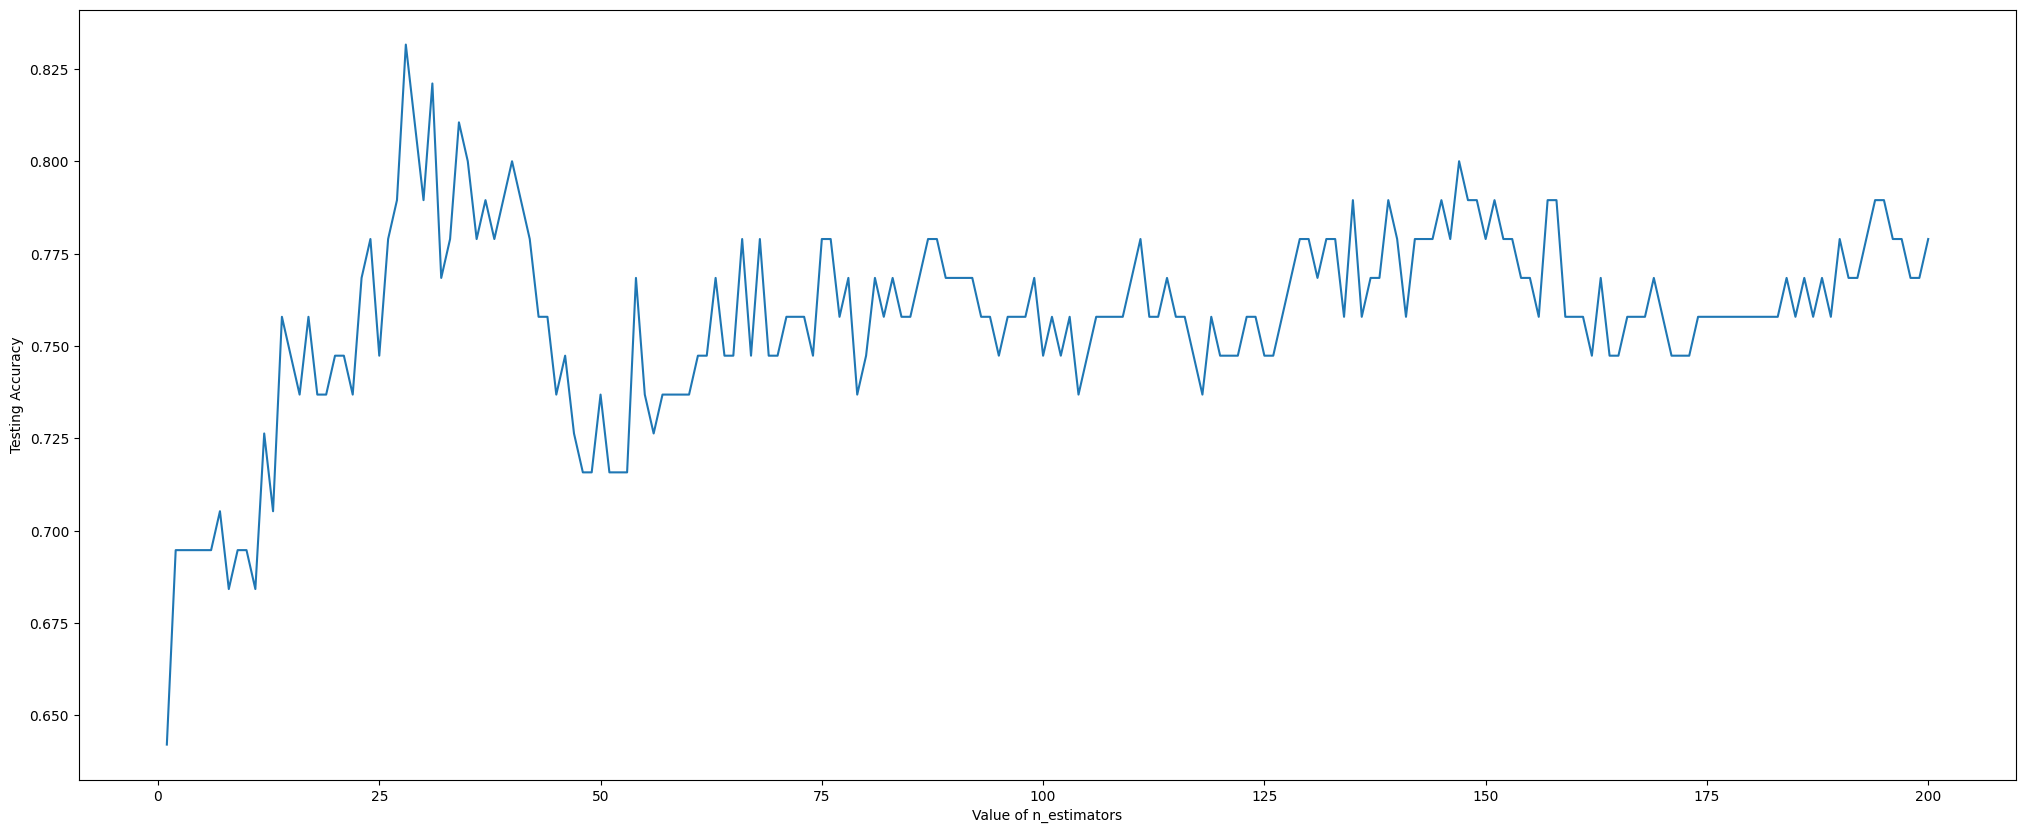

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[45  8]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.81      0.81      0.81        42

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95

Accurecy:  0.8315789473684211




---



---



#Graddient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[47  6]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.85      0.83      0.84        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Accurecy:  0.8631578947368421




---



---



# New Explainable

In [24]:
pip install anchor-exp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for anchor-exp: filename=anchor_exp-0.0.2.0-py3-none-any.whl size=433497 sha256=a396050f3be387bbd445135f85365707562809d7bbb8aa387999c11f6d72330c
  Stored in directory: /root/.cache/pip/wheels/e9/53/45/7e4602020c5e5069ccef79f1389adb8efc4ca3c4d9891388bb
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d0be634ca84f21f322c5dd55f14c2df31a193fbd05f4fe58e498ba345a74870f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built anchor-exp lime


In [25]:
from __future__ import print_function
import numpy as np
np.random.seed(1)
import sys
import sklearn
import sklearn.ensemble
%load_ext autoreload
%autoreload 2
from anchor import utils
from anchor import anchor_tabular


In [27]:
# make sure you have adult/adult.data inside dataset_folder
dataset_folder = '/content/'
dataset = utils.load_dataset('adult', balance=True, dataset_folder=dataset_folder, discretize=True)


In [28]:
c = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)
print('Train', sklearn.metrics.accuracy_score(dataset.labels_train, c.predict(dataset.train)))
print('Test', sklearn.metrics.accuracy_score(dataset.labels_test, c.predict(dataset.test)))


Train 0.9350338780390594
Test 0.8489483747609943


In [30]:
 dataset.class_names

[b'<=50K', b'>50K']

In [31]:
dataset.feature_names

['Age',
 'Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [32]:
dataset.train

array([[ 3.,  6., 15., ...,  0.,  1., 39.],
       [ 2.,  7., 10., ...,  0.,  0., 22.],
       [ 3.,  4., 15., ...,  0.,  0., 39.],
       ...,
       [ 1.,  6.,  5., ...,  0.,  1., 39.],
       [ 3.,  4., 11., ...,  0.,  0., 39.],
       [ 2.,  4., 15., ...,  0.,  0.,  8.]])

In [33]:
 dataset.categorical_names

{1: ['?',
  'Federal-gov',
  'Local-gov',
  'Never-worked',
  'Private',
  'Self-emp-inc',
  'Self-emp-not-inc',
  'State-gov',
  'Without-pay'],
 2: ['10th',
  '11th',
  '12th',
  '1st-4th',
  '5th-6th',
  '7th-8th',
  '9th',
  'Assoc-acdm',
  'Assoc-voc',
  'Bachelors',
  'Doctorate',
  'HS-grad',
  'Masters',
  'Preschool',
  'Prof-school',
  'Some-college'],
 3: ['Divorced',
  'Married-AF-spouse',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Never-married',
  'Separated',
  'Widowed'],
 4: ['?',
  'Adm-clerical',
  'Armed-Forces',
  'Craft-repair',
  'Exec-managerial',
  'Farming-fishing',
  'Handlers-cleaners',
  'Machine-op-inspct',
  'Other-service',
  'Priv-house-serv',
  'Prof-specialty',
  'Protective-serv',
  'Sales',
  'Tech-support',
  'Transport-moving'],
 5: ['Husband',
  'Not-in-family',
  'Other-relative',
  'Own-child',
  'Unmarried',
  'Wife'],
 6: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'],
 7: ['Female', 'Male'],
 8: ['0', '1',

In [29]:
explainer = anchor_tabular.AnchorTabularExplainer(
    dataset.class_names,
    dataset.feature_names,
    dataset.train,
    dataset.categorical_names)


In [ ]:
idx = 0
np.random.seed(1)
print('Prediction: ', explainer.class_names[c.predict(dataset.test[idx].reshape(1, -1))[0]])
exp = explainer.explain_instance(dataset.test[idx], c.predict, threshold=0.95)


In [ ]:
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())


In [ ]:
# Get test examples where the anchora pplies
fit_anchor = np.where(np.all(dataset.test[:, exp.features()] == dataset.test[idx][exp.features()], axis=1))[0]
print('Anchor test precision: %.2f' % (np.mean(c.predict(dataset.test[fit_anchor]) == c.predict(dataset.test[idx].reshape(1, -1)))))
print('Anchor test coverage: %.2f' % (fit_anchor.shape[0] / float(dataset.test.shape[0])))




---



---



1/150 round completed......................... Accurecy: 0.7263157894736842
2/150 round completed......................... Accurecy: 0.7263157894736842
3/150 round completed......................... Accurecy: 0.7368421052631579
4/150 round completed......................... Accurecy: 0.7368421052631579
5/150 round completed......................... Accurecy: 0.7473684210526316
6/150 round completed......................... Accurecy: 0.7473684210526316
7/150 round completed......................... Accurecy: 0.7473684210526316
8/150 round completed......................... Accurecy: 0.7578947368421053
9/150 round completed......................... Accurecy: 0.7578947368421053
10/150 round completed......................... Accurecy: 0.7473684210526316
11/150 round completed......................... Accurecy: 0.7578947368421053
12/150 round completed......................... Accurecy: 0.7789473684210526
13/150 round completed......................... Accurecy: 0.7789473684210526
14/150 r

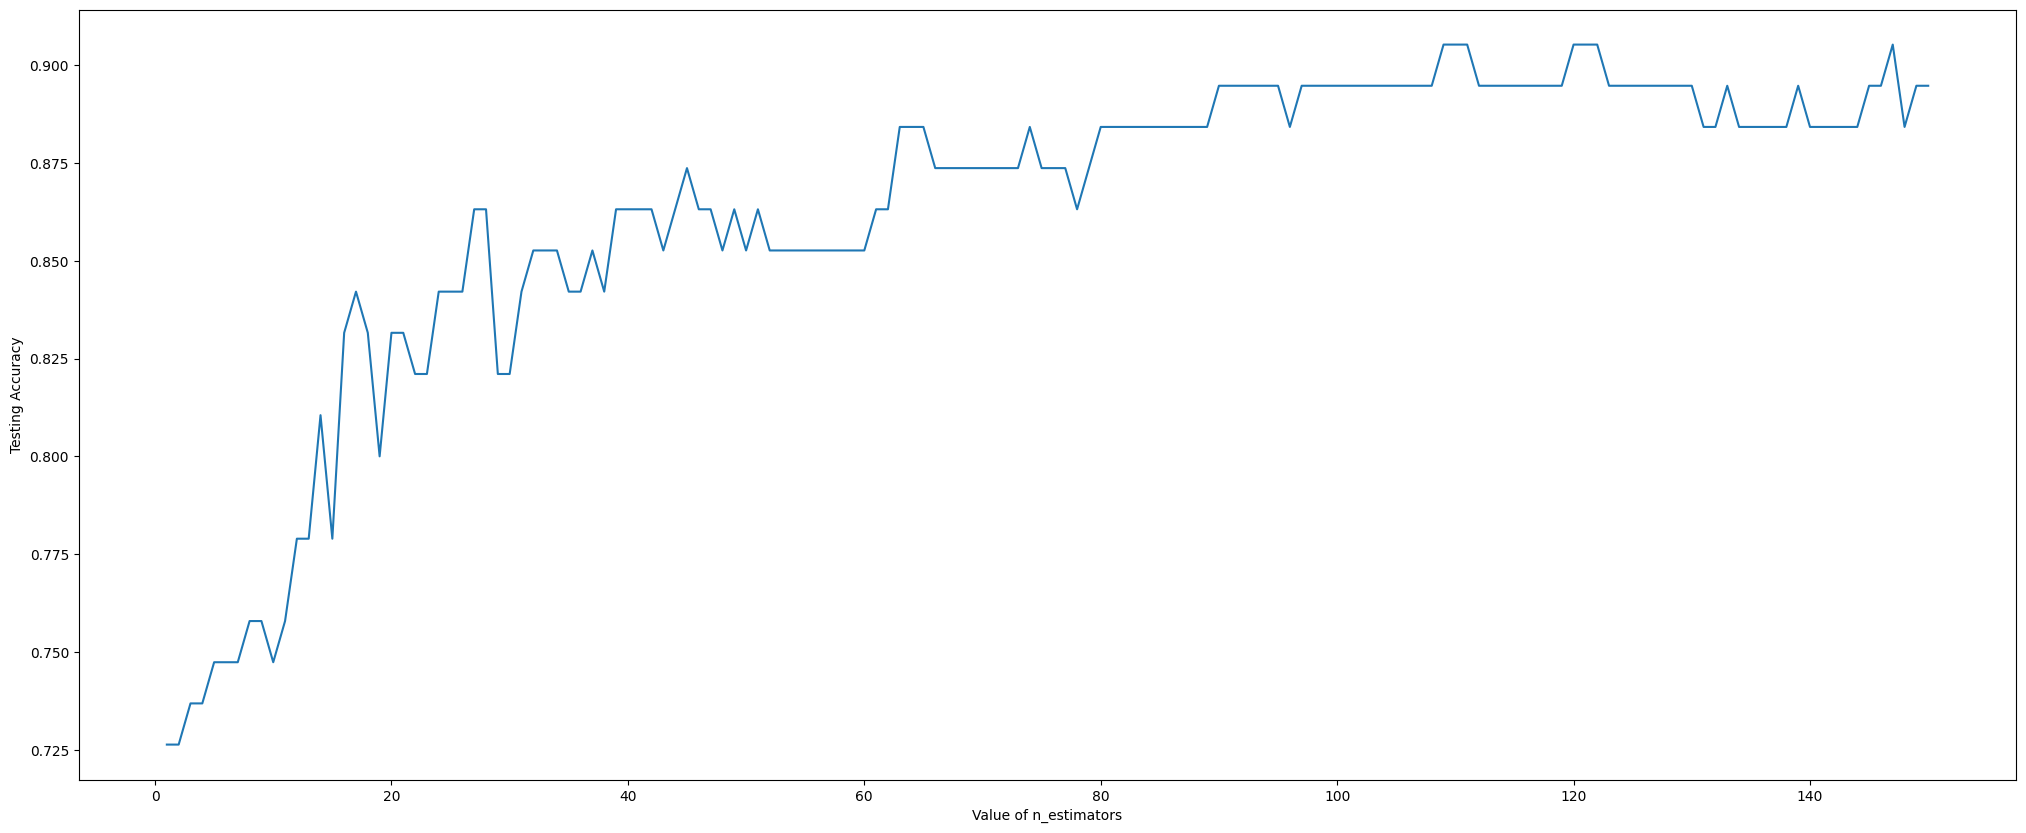

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7368421052631579
2/30 round completed......................... Accurecy: 0.8315789473684211
3/30 round completed......................... Accurecy: 0.8947368421052632
4/30 round completed......................... Accurecy: 0.8947368421052632
5/30 round completed......................... Accurecy: 0.8947368421052632
6/30 round completed......................... Accurecy: 0.8947368421052632
7/30 round completed......................... Accurecy: 0.9052631578947369
8/30 round completed......................... Accurecy: 0.8842105263157894
9/30 round completed......................... Accurecy: 0.7473684210526316
10/30 round completed......................... Accurecy: 0.8
11/30 round completed......................... Accurecy: 0.7894736842105263
12/30 round completed......................... Accurecy: 0.8105263157894737
13/30 round completed......................... Accurecy: 0.8105263157894737
14/30 round completed...............

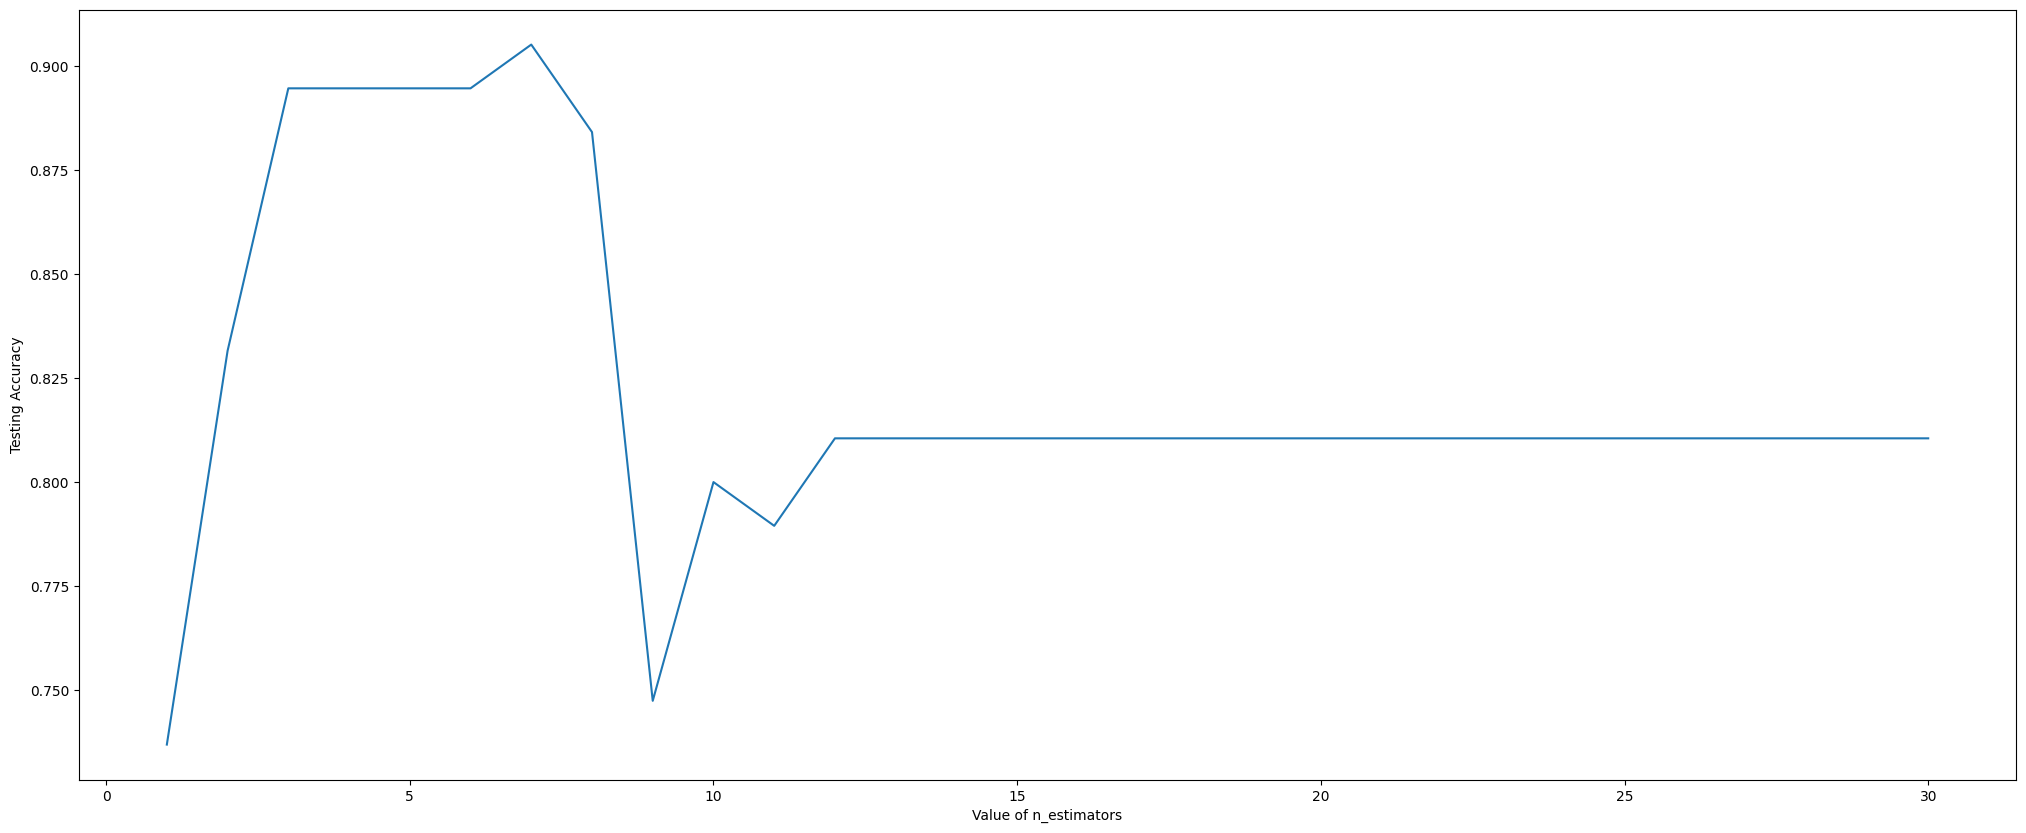

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[50  3]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.92      0.86      0.89        42

    accuracy                           0.91        95
   macro avg       0.91      0.90      0.90        95
weighted avg       0.91      0.91      0.90        95

Accurecy:  0.9052631578947369


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[48  5]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.88      0.90      0.89        42

    accuracy                           0.91        95
   macro avg       0.90      0.91      0.90        95
weighted avg       0.91      0.91      0.91        95

Accurecy:  0.9052631578947369


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[48  5]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.88      0.90      0.89        42

    accuracy                           0.91        95
   macro avg       0.90      0.91      0.90        95
weighted avg       0.91      0.91      0.91        95

Accurecy:  0.9052631578947369




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[47  6]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.86      0.86      0.86        42

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158


1/150 round completed......................... Accurecy: 0.631578947368421
2/150 round completed......................... Accurecy: 0.6842105263157895
3/150 round completed......................... Accurecy: 0.7368421052631579
4/150 round completed......................... Accurecy: 0.7894736842105263
5/150 round completed......................... Accurecy: 0.7473684210526316
6/150 round completed......................... Accurecy: 0.7894736842105263
7/150 round completed......................... Accurecy: 0.7368421052631579
8/150 round completed......................... Accurecy: 0.8105263157894737
9/150 round completed......................... Accurecy: 0.8105263157894737
10/150 round completed......................... Accurecy: 0.8210526315789474
11/150 round completed......................... Accurecy: 0.7894736842105263
12/150 round completed......................... Accurecy: 0.7894736842105263
13/150 round completed......................... Accurecy: 0.7473684210526316
14/150 ro

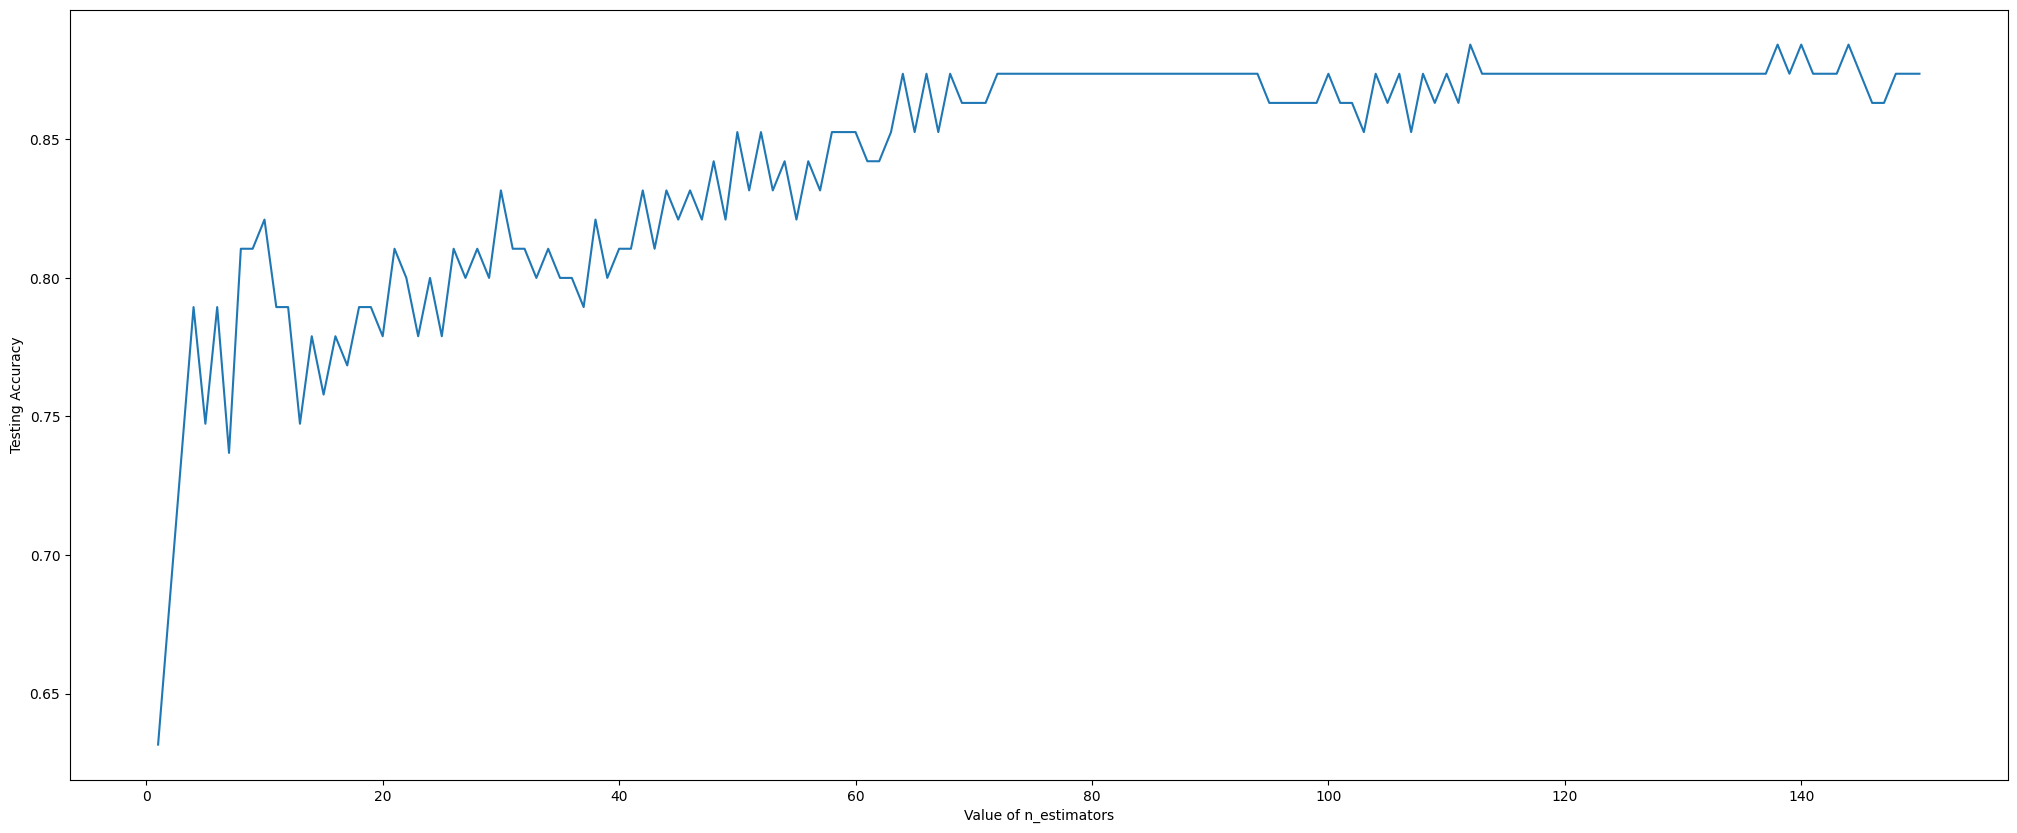

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.6947368421052632
2/150 round completed......................... Accurecy: 0.7473684210526316
3/150 round completed......................... Accurecy: 0.7052631578947368
4/150 round completed......................... Accurecy: 0.7789473684210526
5/150 round completed......................... Accurecy: 0.7789473684210526
6/150 round completed......................... Accurecy: 0.8105263157894737
7/150 round completed......................... Accurecy: 0.8315789473684211
8/150 round completed......................... Accurecy: 0.8315789473684211
9/150 round completed......................... Accurecy: 0.8631578947368421
10/150 round completed......................... Accurecy: 0.8421052631578947
11/150 round completed......................... Accurecy: 0.8526315789473684
12/150 round completed......................... Accurecy: 0.8842105263157894
13/150 round completed......................... Accurecy: 0.8631578947368421
14/150 r

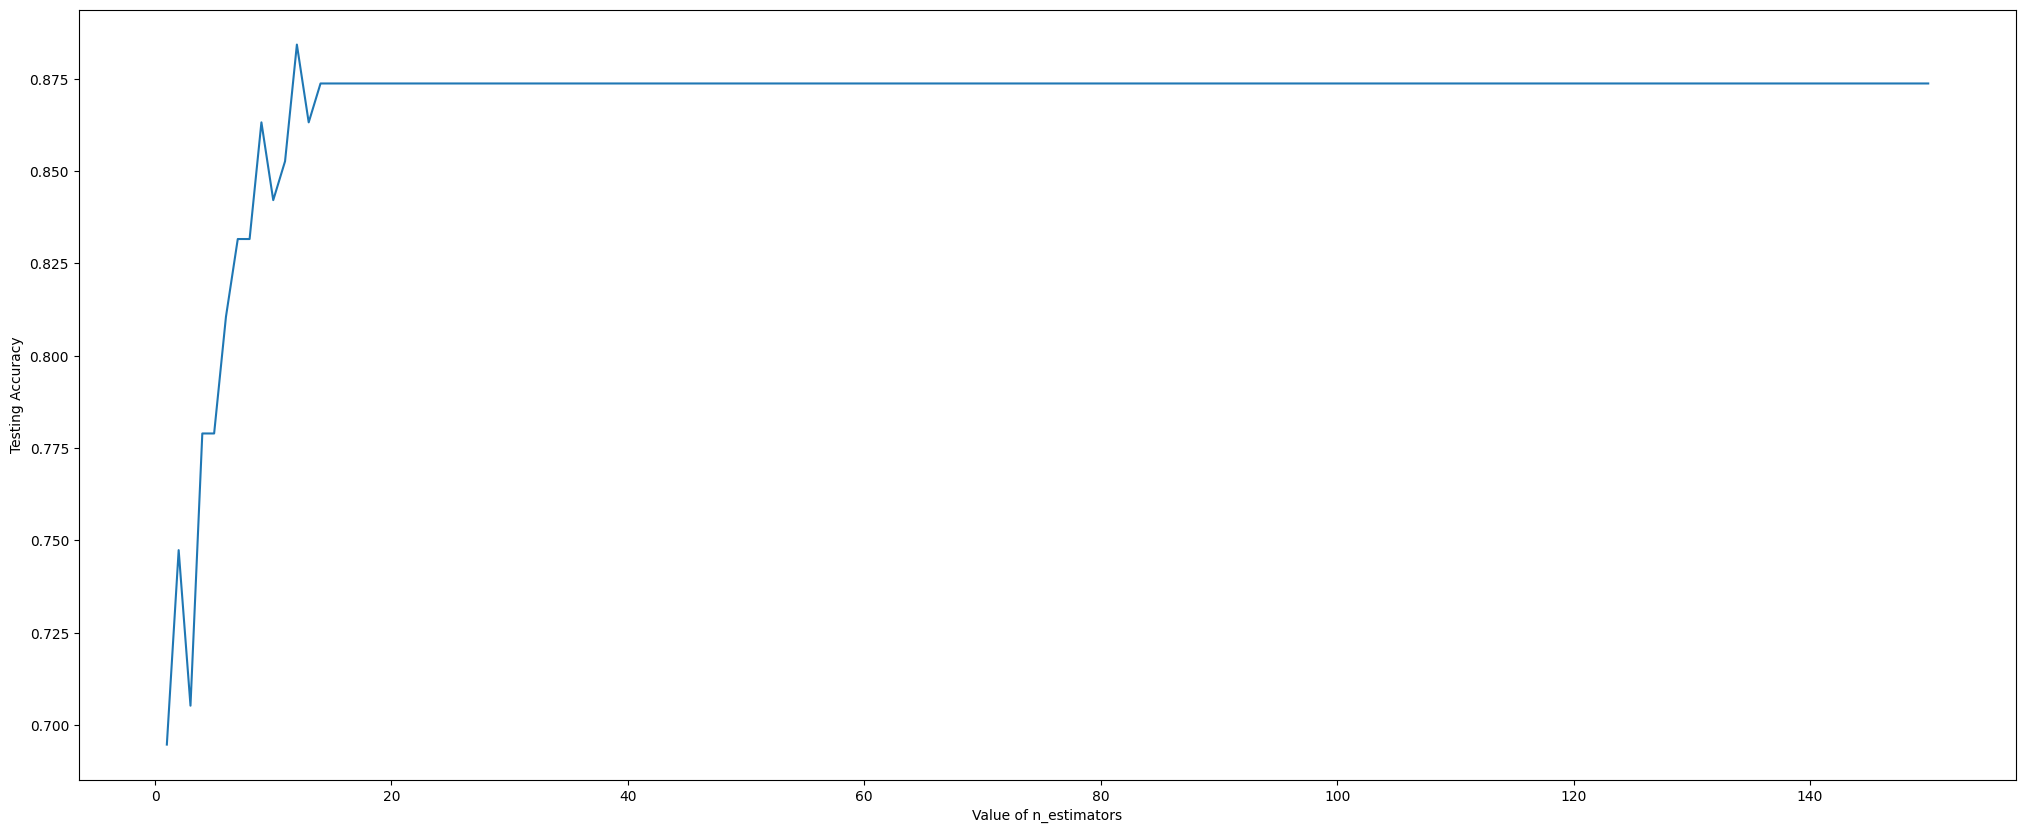

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[48  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.88      0.86      0.87        42

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[48  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.88      0.86      0.87        42

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[47  6]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.86      0.86      0.86        42

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158




---



---



#XGB

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[43 10]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        53
           1       0.78      0.86      0.82        42

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.84      0.83      0.83        95

Accurecy:  0.8315789473684211


1/250 round completed......................... Accurecy: 0.6526315789473685
2/250 round completed......................... Accurecy: 0.7052631578947368
3/250 round completed......................... Accurecy: 0.7473684210526316
4/250 round completed......................... Accurecy: 0.7684210526315789
5/250 round completed......................... Accurecy: 0.7473684210526316
6/250 round completed......................... Accurecy: 0.7263157894736842
7/250 round completed......................... Accurecy: 0.7368421052631579
8/250 round completed......................... Accurecy: 0.7684210526315789
9/250 round completed......................... Accurecy: 0.7789473684210526
10/250 round completed......................... Accurecy: 0.7894736842105263
11/250 round completed......................... Accurecy: 0.7684210526315789
12/250 round completed......................... Accurecy: 0.8
13/250 round completed......................... Accurecy: 0.8
14/250 round completed................

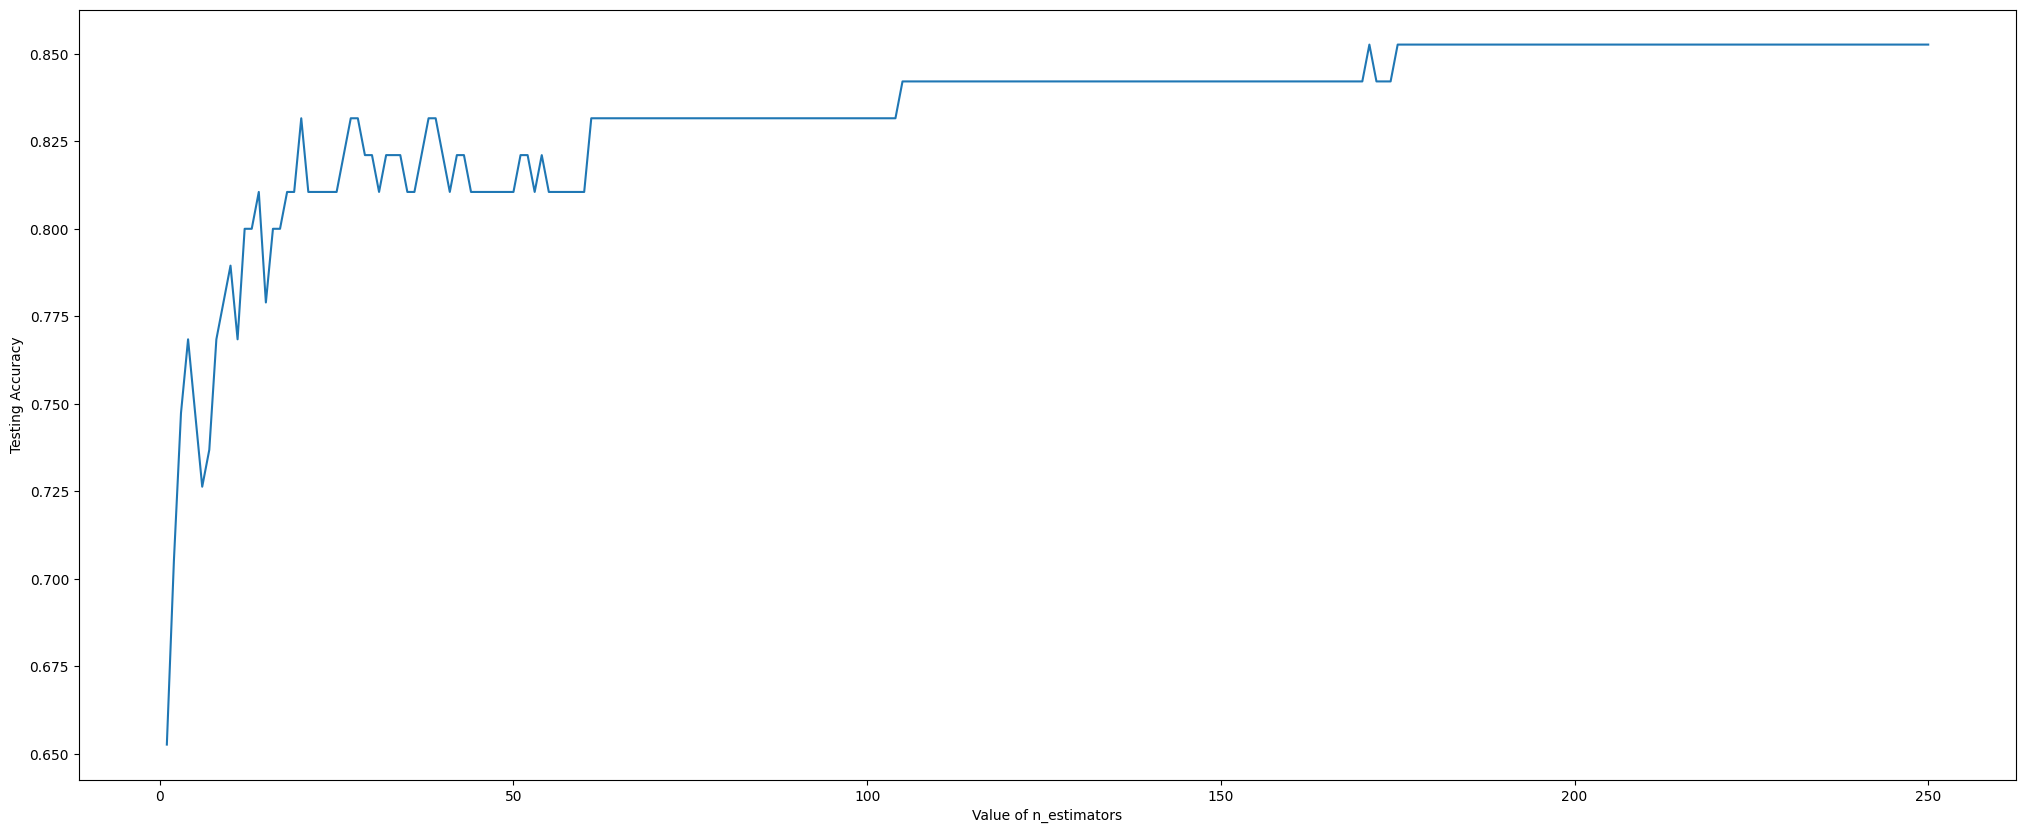

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7578947368421053
2/250 round completed......................... Accurecy: 0.8736842105263158
3/250 round completed......................... Accurecy: 0.8210526315789474
4/250 round completed......................... Accurecy: 0.7894736842105263
5/250 round completed......................... Accurecy: 0.8315789473684211
6/250 round completed......................... Accurecy: 0.8315789473684211
7/250 round completed......................... Accurecy: 0.8421052631578947
8/250 round completed......................... Accurecy: 0.8210526315789474
9/250 round completed......................... Accurecy: 0.8315789473684211
10/250 round completed......................... Accurecy: 0.8315789473684211
11/250 round completed......................... Accurecy: 0.8736842105263158
12/250 round completed......................... Accurecy: 0.8526315789473684
13/250 round completed......................... Accurecy: 0.8526315789473684
14/250 r

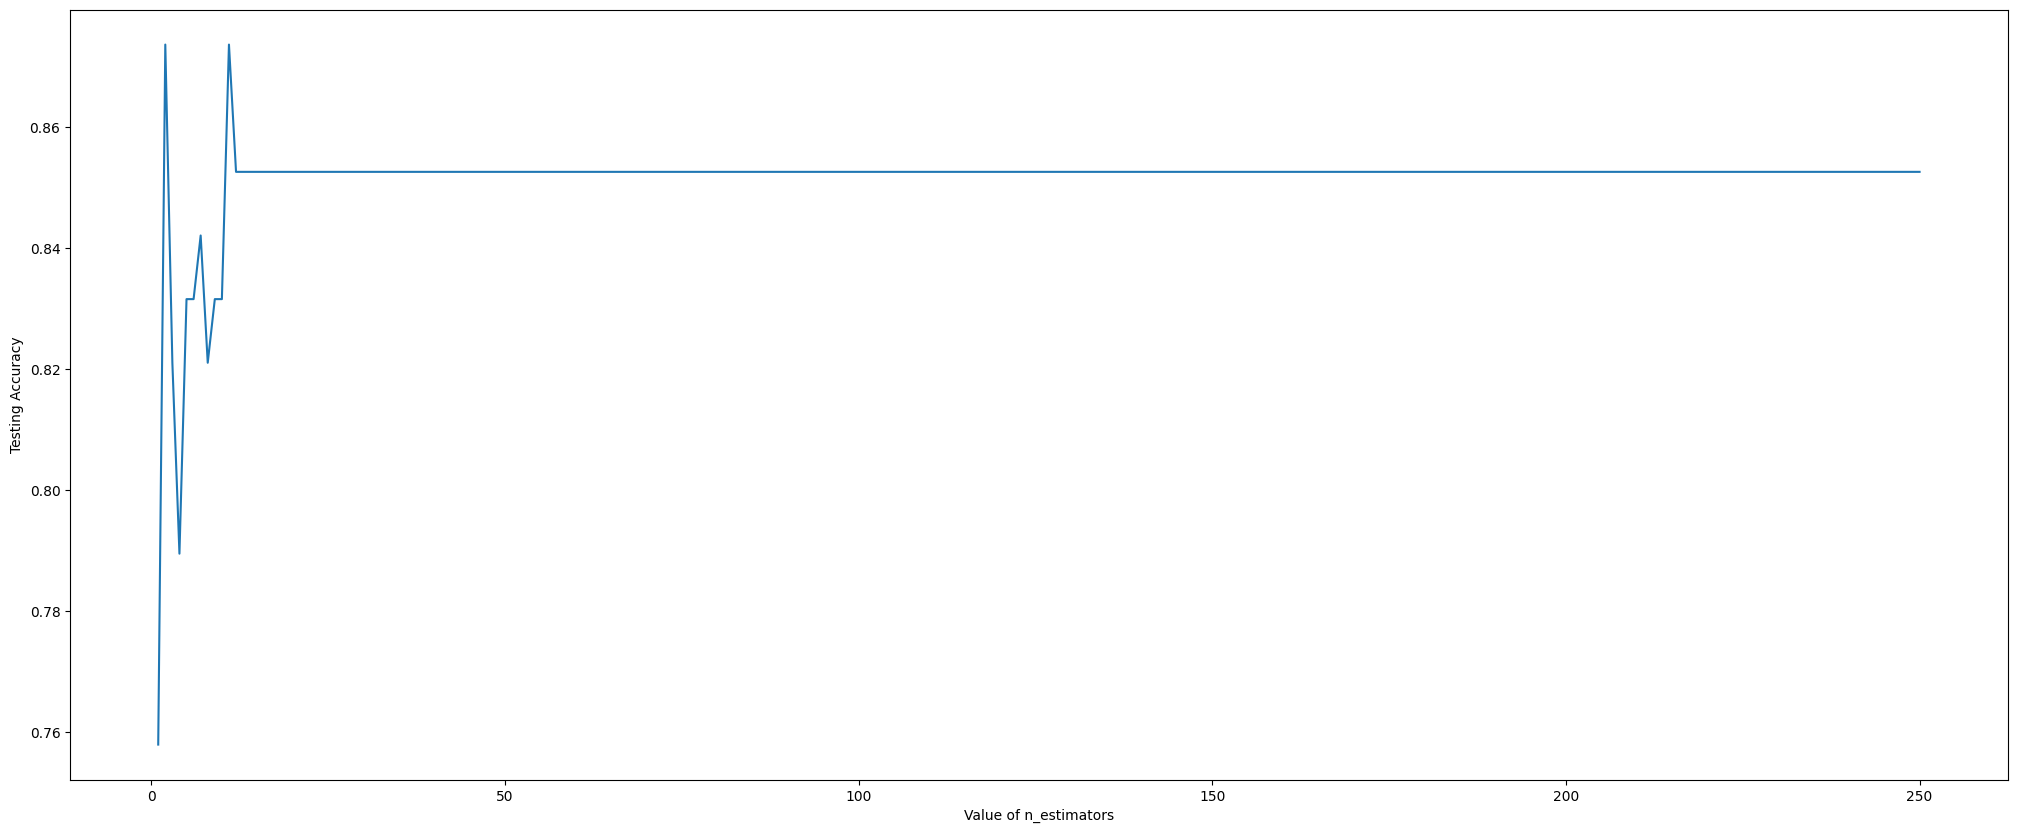

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[48  5]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.88      0.83      0.85        42

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[44  9]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.80      0.88      0.84        42

    accuracy                           0.85        95
   macro avg       0.85      0.86      0.85        95
weighted avg       0.86      0.85      0.85        95

Accurecy:  0.8526315789473684
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=N

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[48  5]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.87      0.81      0.84        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Accurecy:  0.8631578947368421


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[43 10]
 [15 27]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        53
           1       0.73      0.64      0.68        42

    accuracy                           0.74        95
   macro avg       0.74      0.73      0.73        95
weighted avg       0.74      0.74      0.73        95

Accurecy:  0.7368421052631579


1/105 round completed......................... Accurecy: 0.8105263157894737
2/105 round completed......................... Accurecy: 0.7894736842105263
3/105 round completed......................... Accurecy: 0.6842105263157895
4/105 round completed......................... Accurecy: 0.7473684210526316
5/105 round completed......................... Accurecy: 0.7368421052631579
6/105 round completed......................... Accurecy: 0.7368421052631579
7/105 round completed......................... Accurecy: 0.7263157894736842
8/105 round completed......................... Accurecy: 0.7263157894736842
9/105 round completed......................... Accurecy: 0.7578947368421053
10/105 round completed......................... Accurecy: 0.7263157894736842
11/105 round completed......................... Accurecy: 0.7157894736842105
12/105 round completed......................... Accurecy: 0.7157894736842105
13/105 round completed......................... Accurecy: 0.6736842105263158
14/105 r

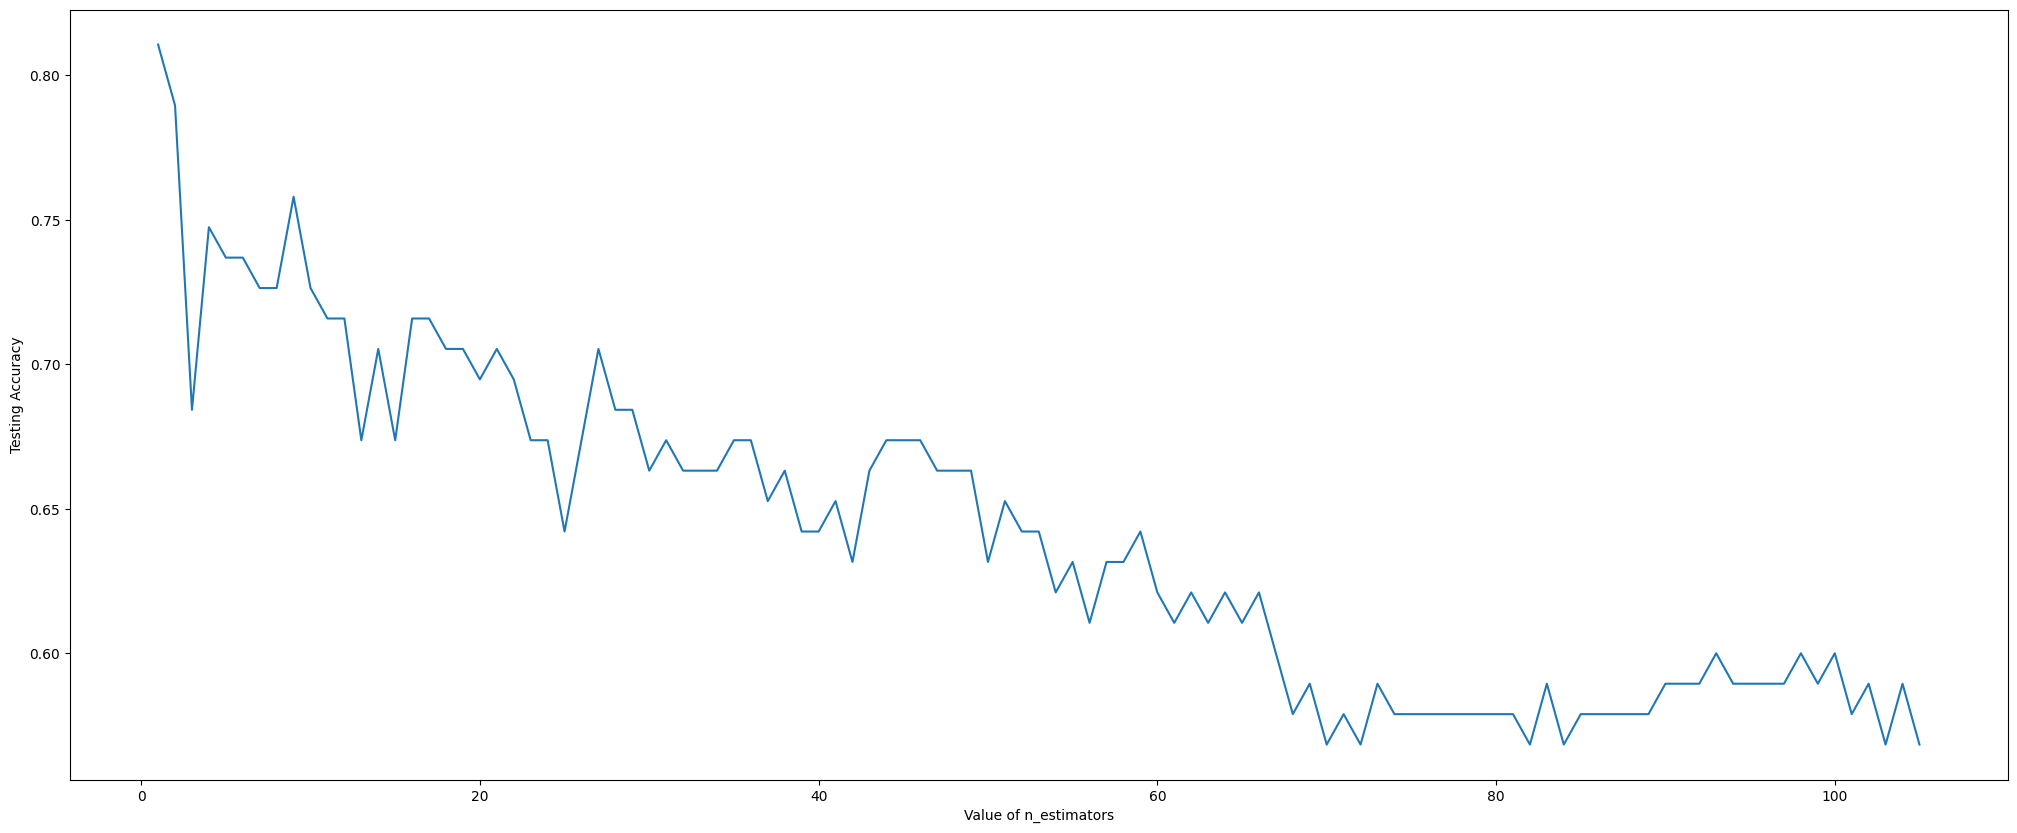

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[40 13]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        53
           1       0.74      0.88      0.80        42

    accuracy                           0.81        95
   macro avg       0.81      0.82      0.81        95
weighted avg       0.82      0.81      0.81        95

Accurecy:  0.8105263157894737


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[51  2]
 [29 13]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77        53
           1       0.87      0.31      0.46        42

    accuracy                           0.67        95
   macro avg       0.75      0.64      0.61        95
weighted avg       0.74      0.67      0.63        95

Accurecy:  0.6736842105263158


#Histogram-Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[48  5]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.88      0.83      0.85        42

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158


100/1000 round completed......................... Accurecy: 0.8736842105263158
200/1000 round completed......................... Accurecy: 0.8631578947368421
300/1000 round completed......................... Accurecy: 0.8736842105263158
400/1000 round completed......................... Accurecy: 0.8842105263157894
500/1000 round completed......................... Accurecy: 0.8736842105263158
600/1000 round completed......................... Accurecy: 0.8736842105263158
700/1000 round completed......................... Accurecy: 0.8736842105263158
800/1000 round completed......................... Accurecy: 0.8736842105263158
900/1000 round completed......................... Accurecy: 0.8736842105263158
1000/1000 round completed......................... Accurecy: 0.8736842105263158
The best max_iter:
400


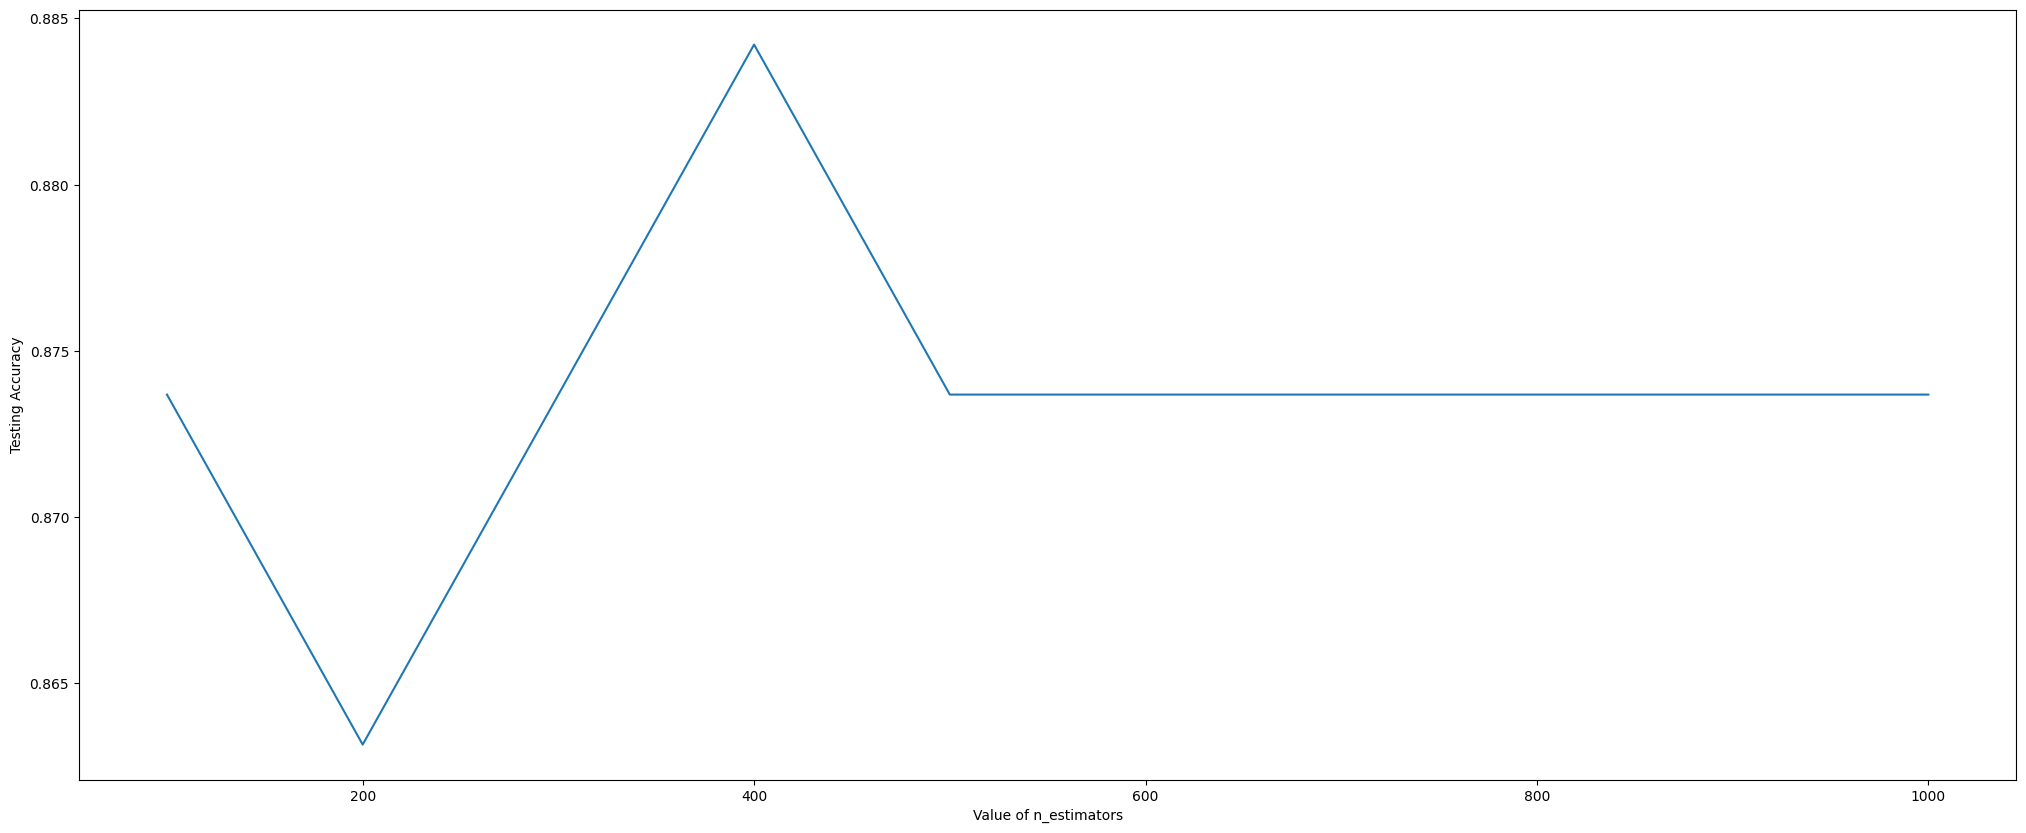

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Accurecy: 0.7263157894736842
2/50 round completed......................... Accurecy: 0.7894736842105263
3/50 round completed......................... Accurecy: 0.8736842105263158
4/50 round completed......................... Accurecy: 0.8315789473684211
5/50 round completed......................... Accurecy: 0.8315789473684211
6/50 round completed......................... Accurecy: 0.8526315789473684
7/50 round completed......................... Accurecy: 0.8526315789473684
8/50 round completed......................... Accurecy: 0.8736842105263158
9/50 round completed......................... Accurecy: 0.8736842105263158
10/50 round completed......................... Accurecy: 0.8736842105263158
11/50 round completed......................... Accurecy: 0.8736842105263158
12/50 round completed......................... Accurecy: 0.8736842105263158
13/50 round completed......................... Accurecy: 0.8736842105263158
14/50 round completed

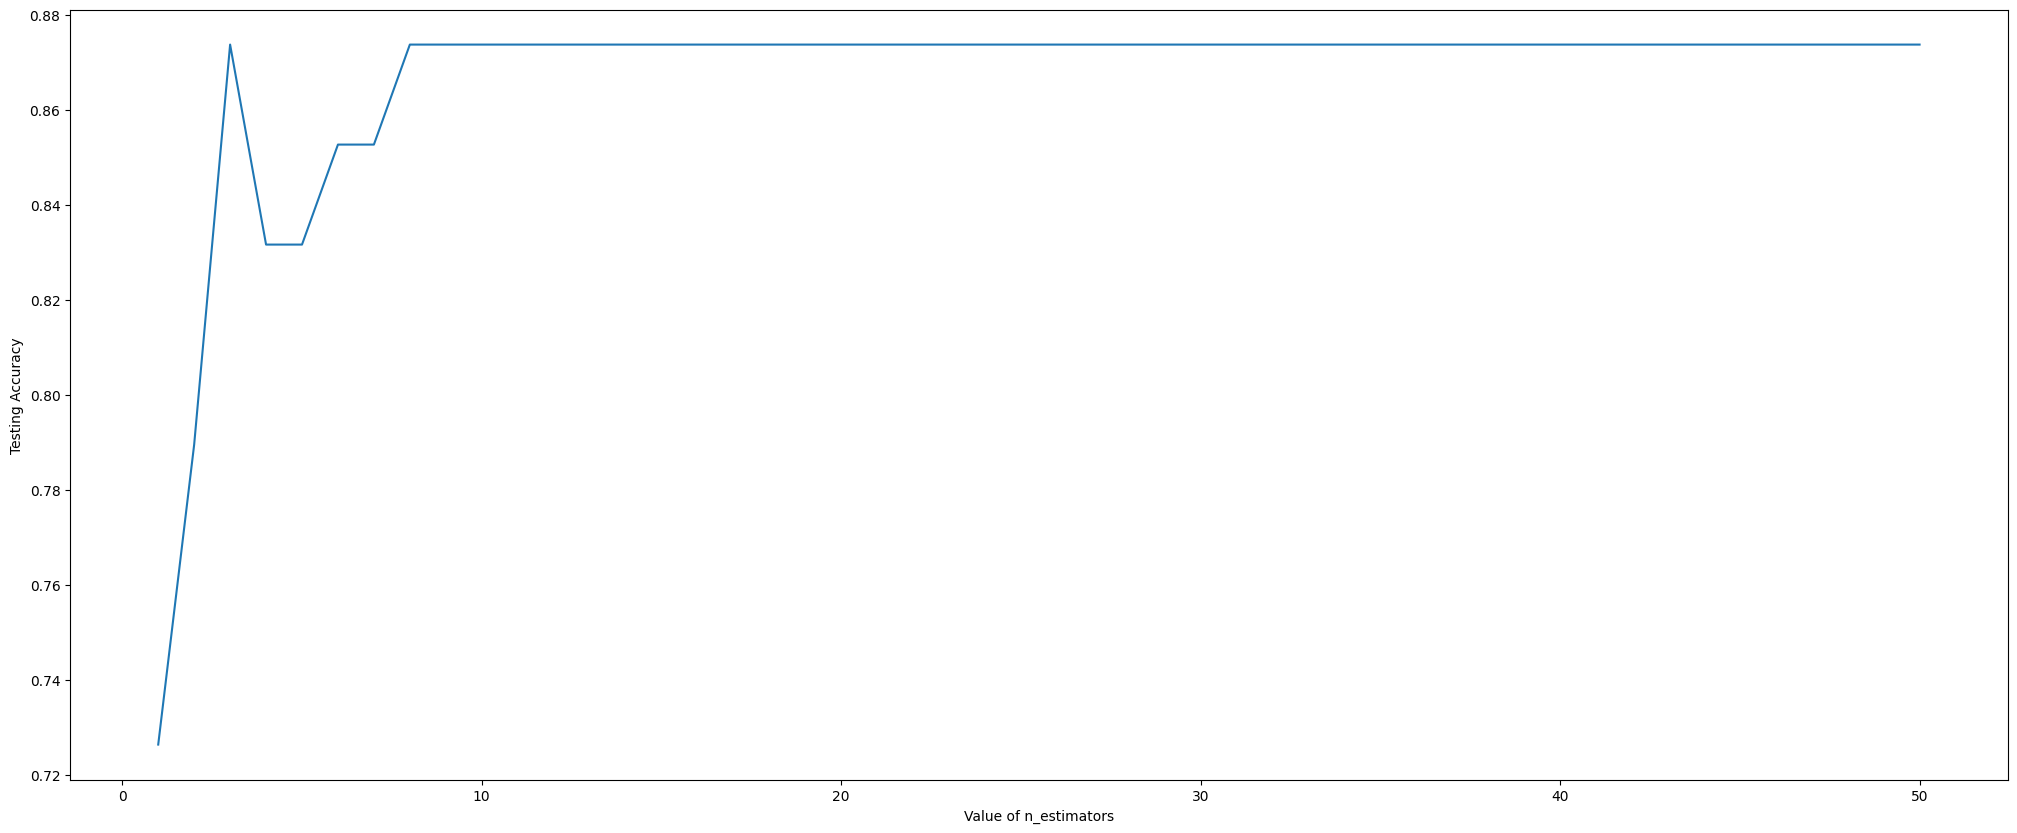

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[46  7]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.84      0.90      0.87        42

    accuracy                           0.88        95
   macro avg       0.88      0.89      0.88        95
weighted avg       0.89      0.88      0.88        95

Accurecy:  0.8842105263157894


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[49  4]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.89      0.81      0.85        42

    accuracy                           0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95

Accurecy:  0.8736842105263158


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[46  7]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.84      0.86      0.85        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Accurecy:  0.8631578947368421


#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.7368421052631579
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=28, random_state=0) 1  :  0.8315789473684211
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.8947368421052632
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=109, random_state=0) 2  :  0.9052631578947369
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=7, random_state=0) 2  :  0.9052631578947369
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0) 2  :  0.9052631578947369
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.8736842105263158
---------------------------------------------------------------

RandomFore

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==10:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(GradientBoostingClassifier(n_estimators=109, random_state=0), 2, 'GradientBoostingClassifier')   :  0.9052631578947369
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=7, random_state=0), 2, 'GradientBoostingClassifier')   :  0.9052631578947369
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0), 2, 'GradientBoostingClassifier')   :  0.9052631578947369
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  0.8947368421052632
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=112, random_state=0), 3, 'RandomForestClassifier')   :  0.8842105263157894
--------------------------

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(GradientBoostingClassifier(n_estimators=109, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=112, random_state=0), 'RandomForestClassifier')
(HistGradientBoostingClassifier(max_iter=400, random_state=0), 'HistGradientBoostingClassifier')
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_

In [ ]:
len(best_models)

10

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
GradientBoostingClassifier(n_estimators=109, random_state=0)
[[50  3]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.92      0.86      0.89        42

    accuracy                           0.91        95
   macro avg       0.91      0.90      0.90        95
weighted avg       0.91      0.91      0.90        95

Accurecy:  0.9052631578947369
--------------------------------------------------
RandomForestClassifier(n_estimators=112, random_state=0)
[[48  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.88      0.86      0.87        42

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894
----------------------------

#SHAP

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30,show=False)

  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("__________________________")
  shap.plots.violin(shap_values1, feature_names=features_names, plot_type="layered_violin",max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Local Explaination")
  shap.plots.violin(shap_values1,feature_names=features_names, max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

  print("___________________________")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('Model Output',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

**Model Check Box Function**

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Control', 'Stroke'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True,fontweight="bold")

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      cm.ax.set_title(str(models[i]), fontsize=75, fontweight="bold")
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(850)
      for label in ax.get_yticklabels():
        label.set_fontweight(850)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…

In [ ]:
'''
from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes, percent=True)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
'''

'\nfrom yellowbrick.classifier import ConfusionMatrix\n\n\nfor i in range(len(new_keys_6)):\n  if new_keys_6[i].value ==True:\n    cm = ConfusionMatrix(models[i], classes=classes, percent=True)\n\n    cm.fit(X_train, y_train)\n    cm.score(X_test, y_test)\n    cm.show()\n'

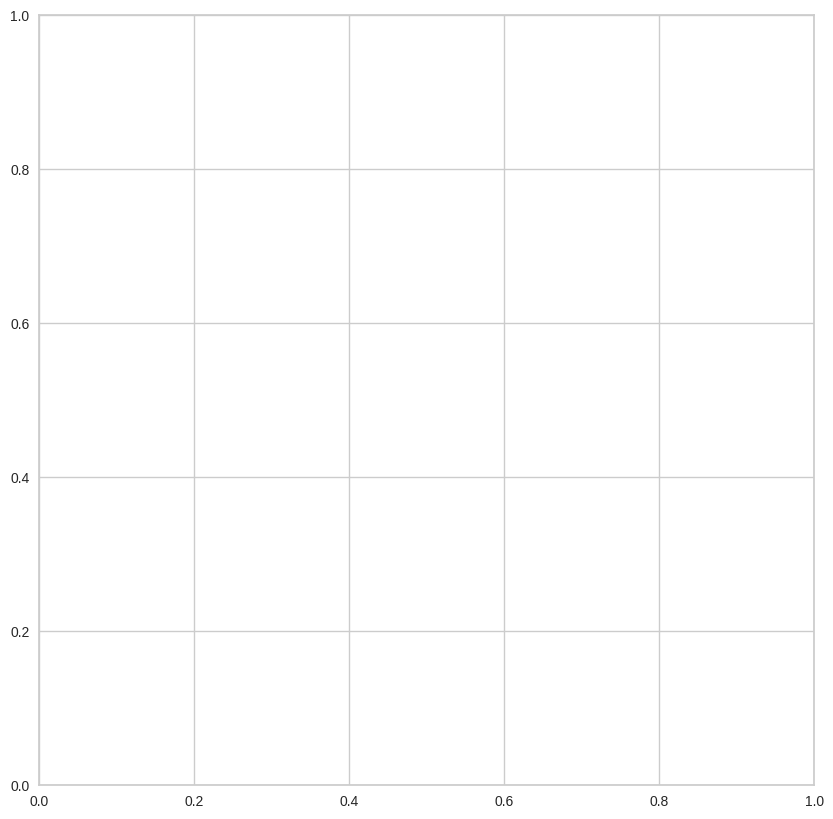

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 35,
  "X Axis Fontsize" : 35,

  "Y Label Fontsize" : 30,
  "X Label Fontsize" : 30,

  "Confusion Matrix Inner Fontsize": 50,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  model_name_dic={
    "GradientBoostingClassifier" : "GBoost",
    "RandomForestClassifier" : "RF",
    "HistGradientBoostingClassifier": "HistGBoost",
    "XGBClassifier" : "XGBoost",
    "KNeighborsClassifier" : "KNN",
    "GaussianNB" : "GaussianNB",
    "AdaBoostClassifier": "AdaBoost"
  }


  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(model_name_dic[str(mod[i]).split('(')[0]])+' (AUROC = %0.3f)' % model_auc[i], lw = 5)

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])

  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=20, weight = 'bold')
  plt.yticks(fontsize=20, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…


Change  the given dictionary of graph feature for desire graph.

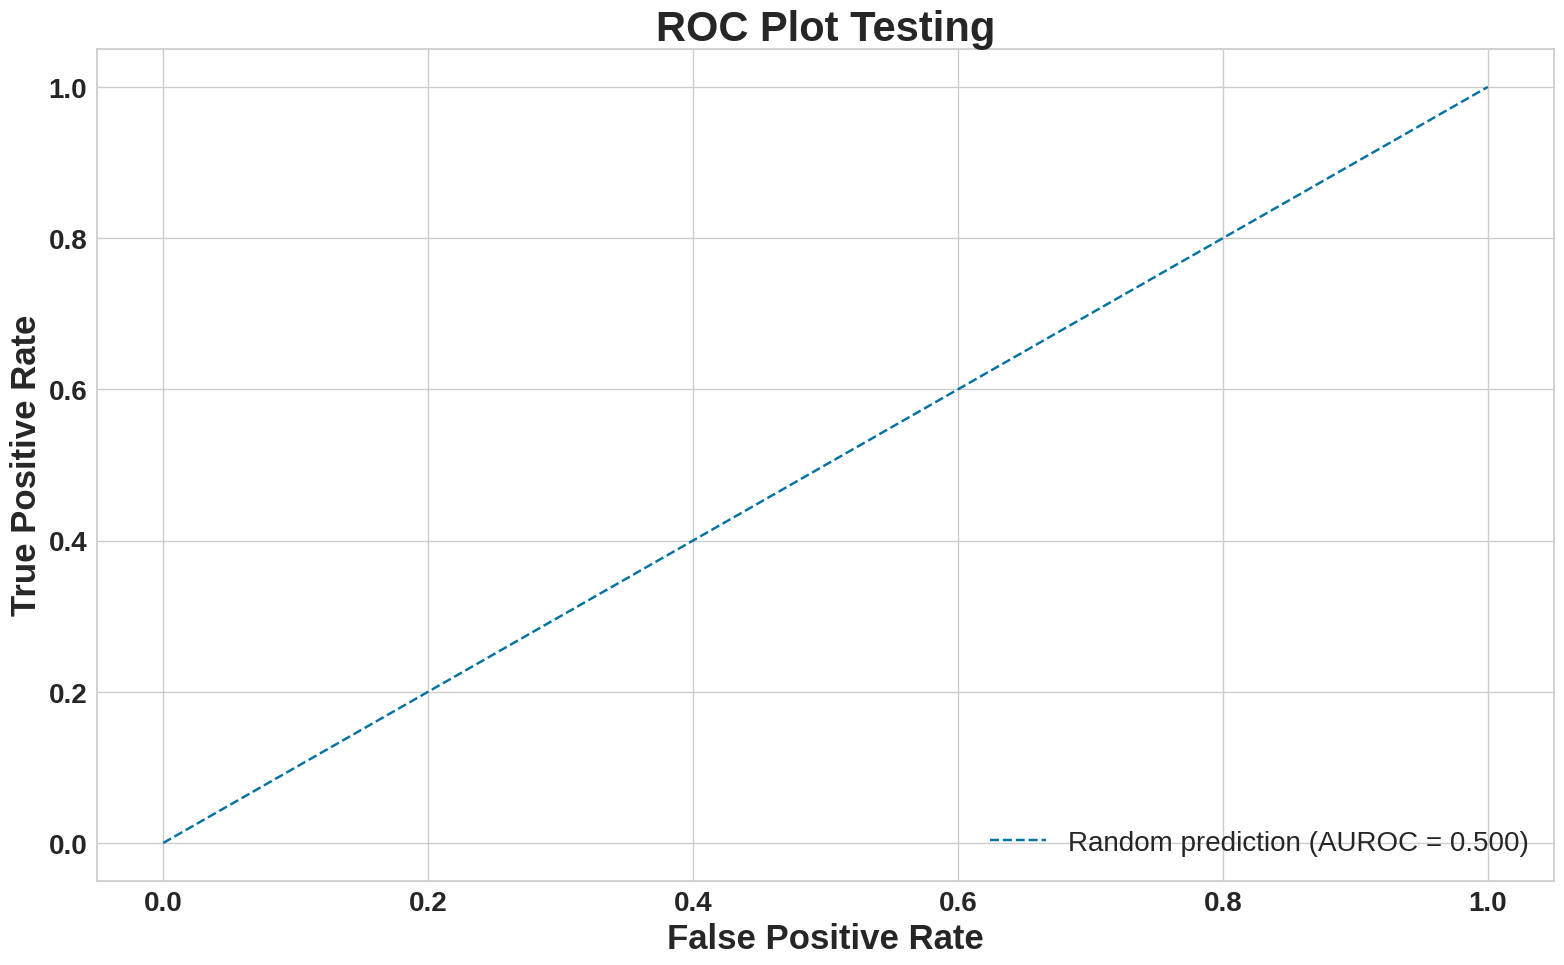

In [ ]:
graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",
    "legend Fontweight":'bold',

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

model_name_dic={
    "GradientBoostingClassifier" : "GBoost",
    "RandomForestClassifier" : "RF",
    "HistGradientBoostingClassifier": "HistGBoost",
    "XGBClassifier" : "XGBoost",
    "KNeighborsClassifier" : "KNN",
    "GaussianNB" : "GaussianNB",
    "AdaBoostClassifier": "AdaBoost"
}


mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])
    #mod.append(model_name_dic[str(models[i]).split('(')[0]])
    #print(str(models[i]).split('(')[0])



ROC(mod,X_test,y_test,graph_feat)





---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…


Change  the given dictionary of graph feature for desire graph.

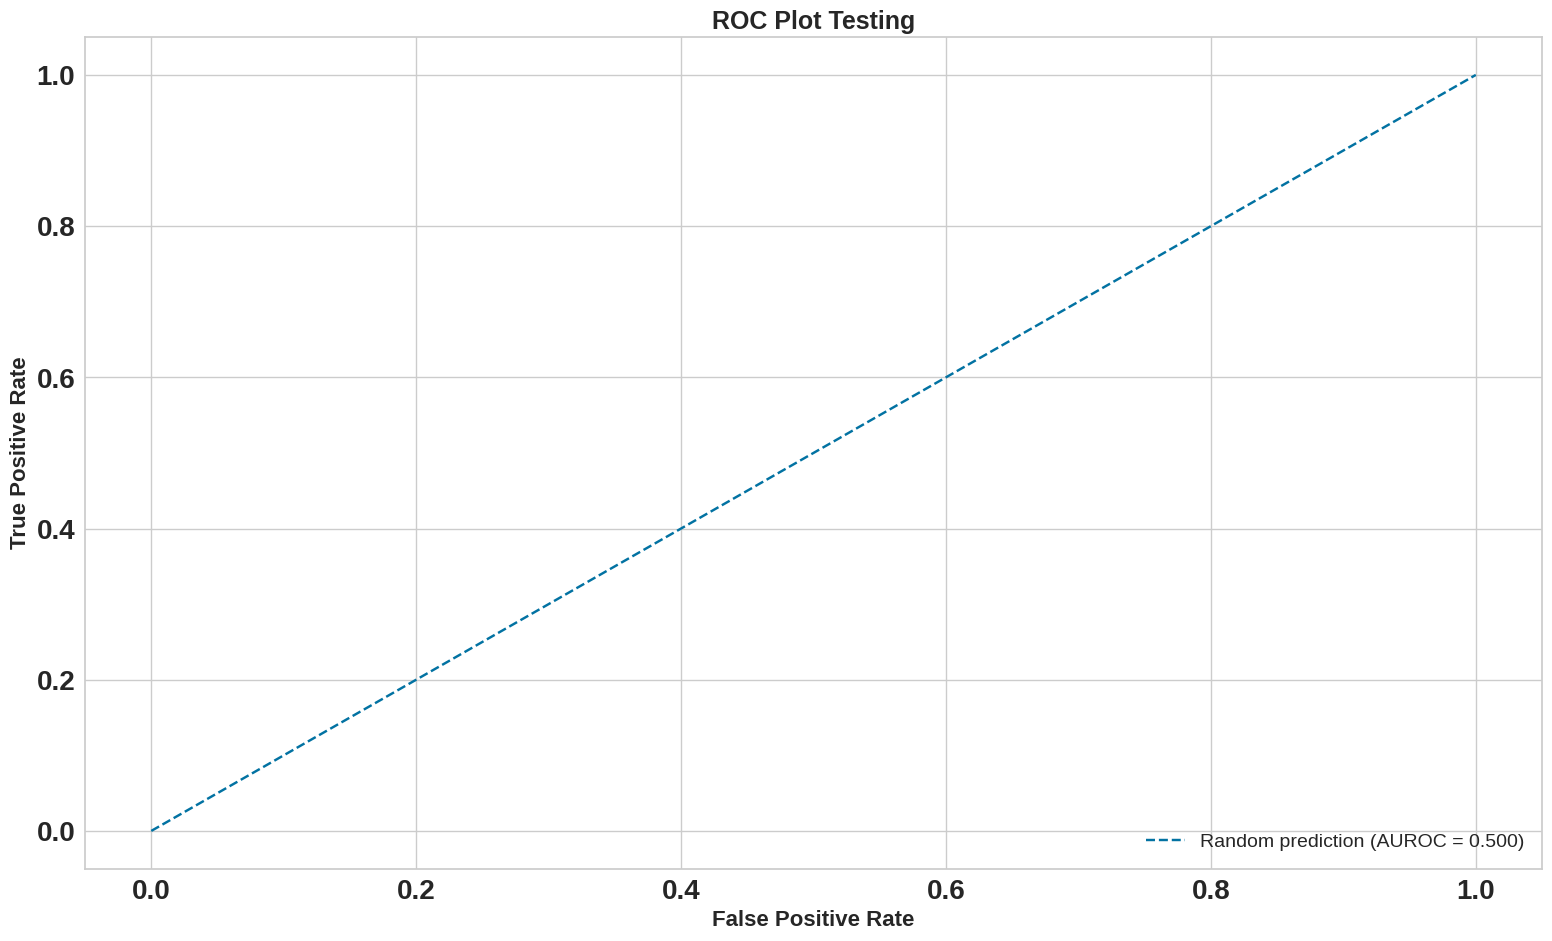

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

# **Performance Matrces_Test Dataset**

In [ ]:
model_compare = models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=28, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=109, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=7, n_estimators=109, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=112, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)', in…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=3, max_iter=400, random_state=0)',…

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



def plotly_plot(df):
  fig = px.bar(df, y=df.columns[1], x=df.columns[0], text_auto='.0%')
  fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False,width=0.4)
  fig.update_layout(
    xaxis_title="<b>"+df.columns[1]+"</b>",
    yaxis_title="<b>"+df.columns[0]+"</b>",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"

	))
  fig.update_xaxes(tickfont_size=20, ticks="outside", ticklen=20, tickwidth=2,tickfont_family="Arial Black")
  fig.update_yaxes(tickfont_size=20, ticks="outside", ticklen=20, tickwidth=2,tickfont_family="Arial Black")
  fig.show()



def plot_model_comp(df):
  plt.figure(figsize=(8, 6))
  sns.set_style("darkgrid", {'grid.color': 'black', 'grid.linestyle': '-'})
  ax = sns.barplot(data=df, x=df.columns[0], y=df.columns[1])

  ax.set_xlabel("Models", fontdict={'size': 40, 'weight': 'bold'})
  ax.set_ylabel("Scores", fontdict={'size': 40, 'weight': 'bold'})
  #ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


  plt.yticks(fontsize=20,fontweight='bold')
  plt.xticks(fontsize=20,fontweight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize=20,fontweight='bold')

  plt.show()


model_name_dic={
    "GradientBoostingClassifier" : "GBoost",
    "RandomForestClassifier" : "RF",
    "HistGradientBoostingClassifier": "HistGBoost",
    "XGBClassifier" : "XGBoost",
    "KNeighborsClassifier" : "KNN",
    "GaussianNB" : "GaussianNB",
    "AdaBoostClassifier": "AdaBoost"
}





m=[]
acc=[]
precision_list=[]
recall_list=[]
f1_score_list=[]



for i in range(len(model_compare)):
  if model_compare[i].value ==True:
    y_pred = models[i].predict(X_test)
    m.append(model_name_dic[str(models[i]).split('(')[0]])
    acc.append(accuracy_score(y_pred,y_test))
    precision_list.append(precision_score(y_pred,y_test))
    recall_list.append(recall_score(y_pred,y_test))
    f1_score_list.append(f1_score(y_pred,y_test))




df_accu = {
    "Models" : m,
    "Accurecy" : acc,

}
df_accu = pd.DataFrame.from_dict(df_accu)


df_precision={
    "Models" : m,
    "Precision" : precision_list
}
df_precision = pd.DataFrame.from_dict(df_precision)

df_recall = {
    "Models" : m,
    "Recall" : recall_list
}
df_recall = pd.DataFrame.from_dict(df_recall)

df_f1_score = {
    "Models" : m,
    "f1_score" : f1_score_list
}
df_f1_score = pd.DataFrame.from_dict(df_f1_score)

##Accurecy

In [ ]:
plotly_plot(df_accu)

In [ ]:
plot_model_comp(df_accu)

ValueError: ignored

<Figure size 800x600 with 0 Axes>

##Precision

In [ ]:
plotly_plot(df_precision)

In [ ]:
plot_model_comp(df_precision)

##Recall

In [ ]:
plotly_plot(df_recall)

In [ ]:
plot_model_comp(df_recall)

##f1_score

In [ ]:
plotly_plot(df_f1_score)

In [ ]:
plot_model_comp(df_f1_score)

# **Voilin Plot_K-fold CV**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}


k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  #l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring))
  #avg=sum(l)/k
  outcome = cross_validate(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)
  #print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print(i[0], outcome)
  print("--------------------------------------------------------------------------")

In [ ]:
vio_plot_key=models_check_box(models)

In [ ]:



k =10
mod_outcomes = []
for i in range(len(vio_plot_key)):
  if vio_plot_key[i].value ==True:
    mod_outcomes.append((str(models[i]).split('(')[0],cross_validate(models[i],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)))

mat_dic={
    'test_accuracy': "Accuracy",
    'test_precision':"Precision",
    'test_recall':"Recall",
    'test_f1_score':"F1-Score"
}



m = []
matrics = []
mat_score = []



for i in mod_outcomes:
  for j in i[1]:
    for l in i[1][j]:
      if j in mat_dic.keys():
        m.append(i[0])
        matrics.append(mat_dic[j])
        mat_score.append(l)


df={
    "Models" : m,
    "Matrics": matrics,
    "Scores":mat_score
}

df = pd.DataFrame.from_dict(df)




import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with a specific size
plt.figure(figsize=(20, 8))

my_pal = {"GradientBoostingClassifier": "cyan", "RandomForestClassifier": "coral", "HistGradientBoostingClassifier": "lime"}
ax = sns.violinplot(data=df, x="Matrics", y="Scores", hue="Models", palette=my_pal)
#ax = sns.violinplot(data=df, y="Performance Scores", hue="Models")

ax.set_xlabel("Matrics", fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel("Performance Scores", fontdict={'size': 20, 'weight': 'bold'})
#ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')

plt.legend(title='Models',fontsize= 15, title_fontproperties={'weight':'bold'})


plt.show()




# **CV_ROC**

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 5,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=25, weight = 'bold')
  plt.yticks(fontsize=25, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

def LIME_EXP(model,row):
  import lime
  from lime import lime_tabular


  if str(model)[:3] == "XGB":

    '''
    explainer = lime.lime_tabular.LimeTabularExplainer(
      X_train.values,
      feature_names=list(list(X_new.columns)),
      class_names=['Reading', 'Resting', 'Walking', 'Working']
      )

    exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                model.predict_proba,
                                num_features=6,
                                top_labels=2)'''
    print("Plz RUN XGboost cell....")
    return None

  else:
    explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(X_train),
      feature_names=list(X_new.columns),
      class_names=['Control', 'Stroke'],
      mode='classification'
      )

    exp = explainer.explain_instance(X_test.iloc[row],
                                    model.predict_proba,
                                    num_features=6,
                                    top_labels=4)



  #exp.show_in_notebook(show_table=True, show_all=True)
  exp.show_in_notebook(show_table=True)


  import matplotlib.pyplot as plt
  with plt.style.context("ggplot"):
      exp.as_pyplot_figure()


  from IPython.display import HTML
  html_data = exp.as_html()
  HTML(data=html_data)

  exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME

In [ ]:

new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Control', 'Stroke'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_deafult.html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_depth.html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_estimator.html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_all.html")